In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,accuracy_score, recall_score, f1_score,roc_auc_score,classification_report,roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from scipy.stats import kurtosis


In [2]:
#load dataset

path="./train.csv"
test_path="./test.csv"
df=pd.read_csv(path)

df.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [3]:
df.columns

Index(['Trip_ID', 'Trip_Distance', 'Type_of_Cab', 'Customer_Since_Months',
       'Life_Style_Index', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Gender', 'Surge_Pricing_Type'],
      dtype='object')

In [4]:
df.set_index('Trip_ID', inplace=True)

In [5]:
#null %
for column in df.columns:
    print("Percentage of missing values in {} is: {:.2f}".format(column, (df[column].isnull().sum()*100)/len(df)),df[column].dtype)

Percentage of missing values in Trip_Distance is: 0.00 float64
Percentage of missing values in Type_of_Cab is: 15.35 object
Percentage of missing values in Customer_Since_Months is: 4.50 float64
Percentage of missing values in Life_Style_Index is: 15.34 float64
Percentage of missing values in Confidence_Life_Style_Index is: 15.34 object
Percentage of missing values in Destination_Type is: 0.00 object
Percentage of missing values in Customer_Rating is: 0.00 float64
Percentage of missing values in Cancellation_Last_1Month is: 0.00 int64
Percentage of missing values in Var1 is: 53.95 float64
Percentage of missing values in Var2 is: 0.00 int64
Percentage of missing values in Var3 is: 0.00 int64
Percentage of missing values in Gender is: 0.00 object
Percentage of missing values in Surge_Pricing_Type is: 0.00 int64


In [6]:
df.drop({'Var1'},axis=1, inplace=True)

In [7]:
#removed ID and claim cols
X=df.iloc[:,:-1]
y=df['Surge_Pricing_Type']

In [8]:
cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(exclude='object').columns


In [9]:
num_imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
cat_imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
na_col=['Type_of_Cab', 'Customer_Since_Months','Life_Style_Index','Confidence_Life_Style_Index']
for i in na_col:
    if X[i].dtype=='object':
        X[[i]]=cat_imputer.fit_transform(X[[i]])
    elif X[i].dtype!='object':
        X[[i]]=num_imputer.fit_transform(X[[i]])

In [10]:
X.describe()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var2,Var3
count,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000
mean,44.200909,6.016661,2.802064,2.849458,0.782838,51.202800,75.099019
std,25.522882,3.544410,0.207760,0.980675,1.037559,4.986142,11.578278
min,0.310000,0.000000,1.596380,0.001250,0.000000,40.000000,52.000000
25%,24.580000,3.000000,2.687952,2.152500,0.000000,48.000000,67.000000
50%,38.200000,6.016661,2.802064,2.895000,0.000000,50.000000,74.000000
75%,60.730000,10.000000,2.912815,3.582500,1.000000,54.000000,82.000000
max,109.230000,10.000000,4.875110,5.000000,8.000000,124.000000,206.000000


In [11]:
X.describe(include=[np.object])

,Type_of_Cab,Confidence_Life_Style_Index,Destination_Type,Gender
count,131662,131662,131662,131662
unique,5,3,14,2
top,B,B,A,Male
freq,51346,60548,77597,93900


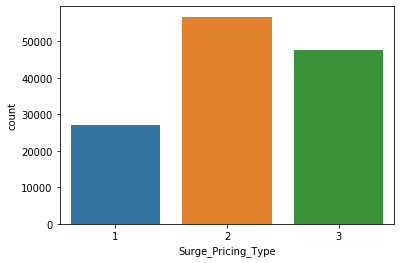

In [12]:
#Count of target
sns.countplot(y)

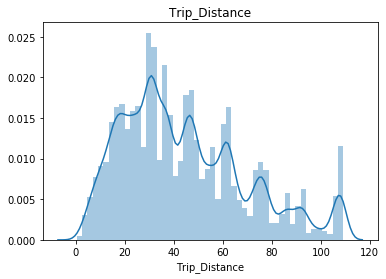

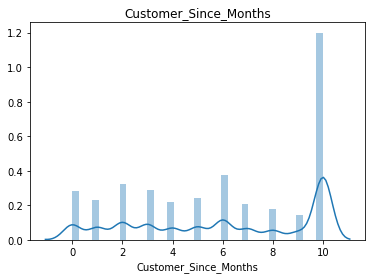

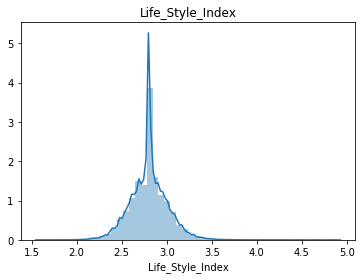

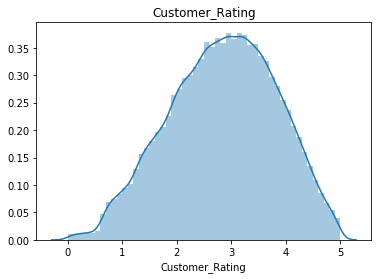

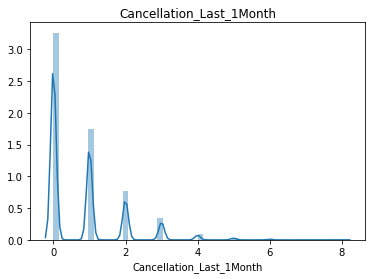

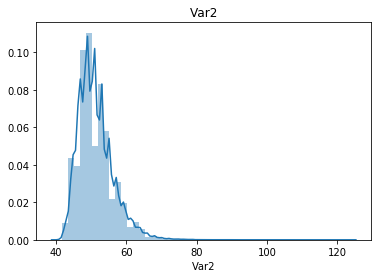

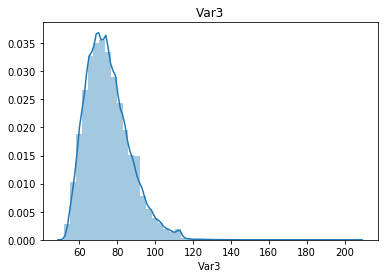

In [13]:
for col in num_cols:
    sns.distplot(X[col])
    plt.xlabel(col)
    plt.title(col)
    plt.show()

In [14]:
X['Cancellation_Last_1Month'].skew()
print("Skew of raw data: %f" % X['Cancellation_Last_1Month'].skew()) #check skewness
print("Kurtosis of raw data: %f" % kurtosis(X['Cancellation_Last_1Month'],fisher = False ))

Skew of raw data: 1.550869
Kurtosis of raw data: 5.700217


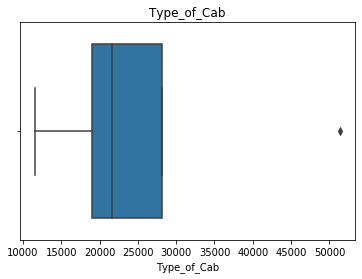

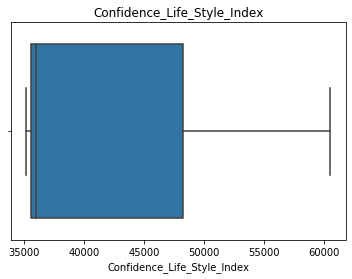

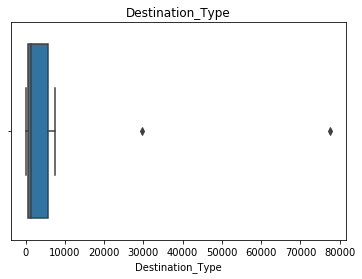

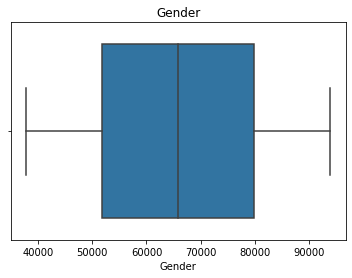

In [15]:
#Categorical feature distribution
for col in X.select_dtypes(include=['object']):
    sns.boxplot(X[col].value_counts())
    plt.xlabel(col)
    plt.title(col)
    plt.show()

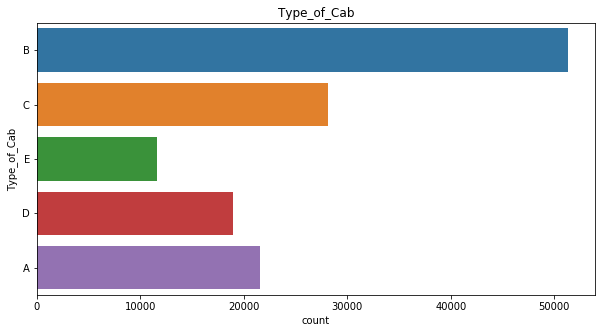

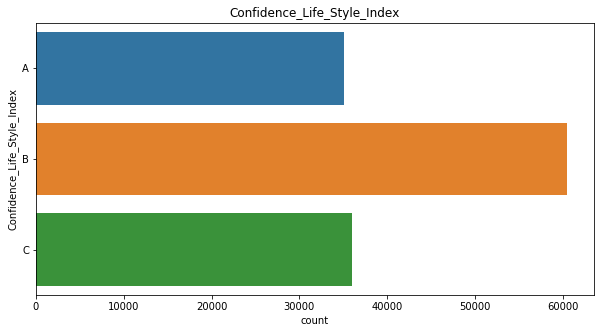

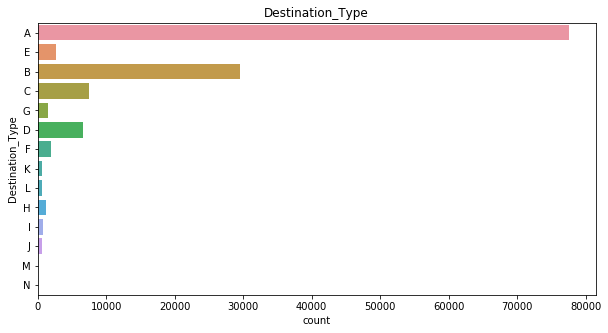

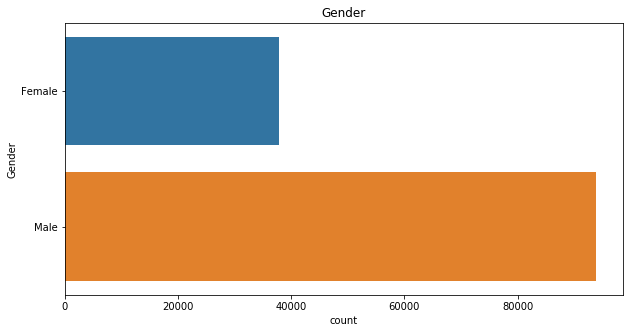

In [16]:
#Categorical feature distribution
for col in X.select_dtypes(include=['object']):
    y_size=5
    if X[col].nunique()/2 > 10:
        y_size=X[col].nunique()/2
    #print(round(y_size))
    plt.figure(figsize=(10,y_size))
    sns.countplot(y=X[col])
    plt.title(col)
    plt.show()

(7.0, 0.0)

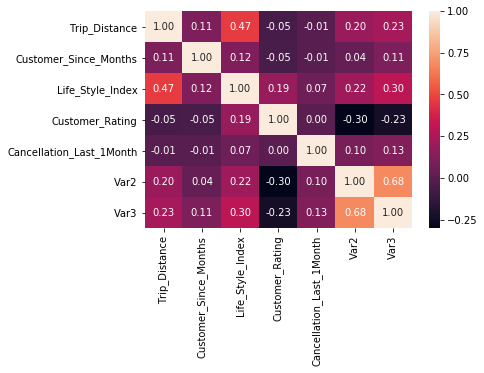

In [17]:
df_corr = X.corr()
ax = sns.heatmap(df_corr, annot=True, fmt='.2f') #notation: "annot" not "annote"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
#not much correlation

In [18]:
#label encoding
encoder = LabelEncoder()
for col in cat_cols:
    X[col] = encoder.fit_transform(X[col])

In [19]:
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=42,test_size =0.2)

In [20]:
#Basic logreg model
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
print(logreg.score(X_test,y_test))
print("Accuracy = " , accuracy_score(y_test, y_pred))

0.6410587475790833
Accuracy =  0.6410587475790833


C:\Users\vth006\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [22]:
#hyperparameter decision tree
#Parameter grid
parameter_grid = {'max_depth': np.arange(3,10), 'min_samples_leaf': range(10,50,100),'criterion' : ('entropy','gini')}

# Code starts here
dt=DecisionTreeClassifier(random_state=0)
p_tree=GridSearchCV(estimator=dt, param_grid=parameter_grid,cv=5)
p_tree.fit(X_train,y_train)
y_pred2=p_tree.predict(X_test)
print("Accuracy = " , accuracy_score(y_test, y_pred2))
p_tree.best_params_
# Code ends here

Accuracy =  0.6795275889568222


{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 10}

In [24]:
rf_clf=RandomForestClassifier(n_estimators=100,n_jobs=100,random_state=0)
rf_clf.fit(X_train,y_train)
print("Accuracy = " ,rf_clf.score(X_test,y_test))



Accuracy =  0.6825656020962291


Accuracy =  0.6898568336308054


<function matplotlib.pyplot.show(*args, **kw)>

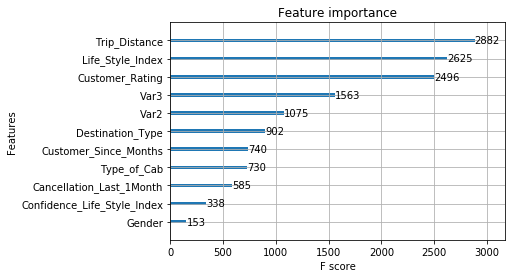

In [25]:
from xgboost import plot_importance
from xgboost import XGBClassifier

xgb_clf=XGBClassifier(random_state=0)
xgb_clf.fit(X_train,y_train)
print("Accuracy = " ,xgb_clf.score(X_test,y_test))

plot_importance(xgb_clf)
plt.show

In [33]:
#hyperparameter random forest
#Parameter grid
parameter_grid = {'max_depth': np.arange(3,10), 'min_samples_leaf': range(10,50,100),'criterion' : ('entropy','gini')}

# Code starts here
rf_clf1=RandomForestClassifier(random_state=0)
p_forest=GridSearchCV(estimator=rf_clf1, param_grid=parameter_grid,cv=5)
p_forest.fit(X_train,y_train)
print("Accuracy = " ,p_forest.score(X_test,y_test))
p_forest.best_params_
# Code ends here

Accuracy =  0.685869441385334


{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 10}

In [34]:
df_test=pd.read_csv(test_path)
df_test.head()

df_test.set_index('Trip_ID', inplace=True)
df_test.drop({'Var1'},axis=1, inplace=True)

for i in na_col:
    if df_test[i].dtype=='object':
        df_test[[i]]=cat_imputer.fit_transform(df_test[[i]])
    elif df_test[i].dtype!='object':
        df_test[[i]]=num_imputer.fit_transform(df_test[[i]])
        
#label encoding
encoder = LabelEncoder()
for col in cat_cols:
    df_test[col] = encoder.fit_transform(df_test[col])

In [35]:
df_test['Surge_Pricing_Type']=p_forest.predict(df_test)
df_test.reset_index(inplace=True)
test=df_test[['Trip_ID','Surge_Pricing_Type']]
test.to_csv('Submission_file.csv',index=False)
print("Submission file created with columns", test.columns)

Submission file created with columns Index(['Trip_ID', 'Surge_Pricing_Type'], dtype='object')
